# Librerias

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Cargar datos

In [5]:
dataset = load_wine()
datos = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
datos.head(30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


# Estandarizar datos

In [7]:
datos['Target'] = dataset.target

scaler = StandardScaler()
datos_escalados = datos.copy()
datos_escalados.iloc[:, :-1] = scaler.fit_transform(datos.iloc[:, :-1])

# Reduccion de dimensiones

In [9]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(datos_escalados.iloc[:, :-1])

# Graficar los resultados

In [11]:
datos_pca= pd.DataFrame(data= X_pca, columns=['PC1','PC2','PC3'])
datos_pca['Target']= datos['Target']
datos_pca

,PC1,PC2,PC3,Target
0,3.316751,1.443463,-0.165739,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008908,0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,2.216289,-0.342570,2
174,-2.601956,1.757229,0.207581,2
175,-2.677839,2.760899,-0.940942,2
176,-2.387017,2.297347,-0.550696,2


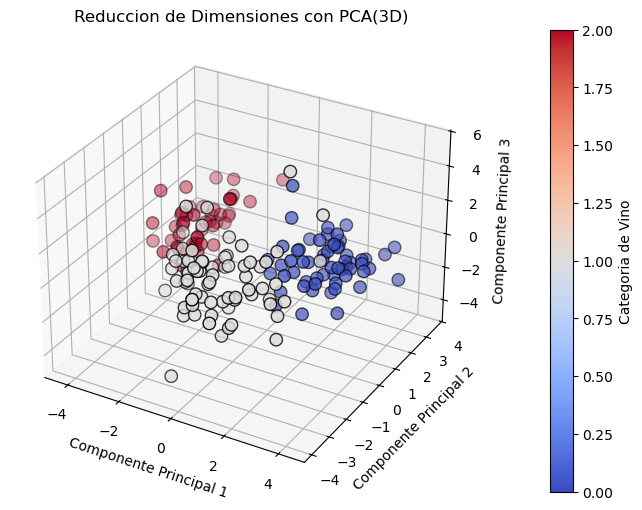

In [12]:
#plt.figure(figsize=(10,6))
#scatter= plt.scatter(datos_pca['PC1'],datos_pca['PC2'], c=datos_pca['Target'],
#                   cmap='coolwarm',edgecolor='k', s=100)
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
#plt.title('Reduccion de dimensiones con PCA')
#plt.colorbar(scatter, label= 'Categoria de Vino')
#plt.show()

fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(111, projection='3d')
scatter= ax.scatter(datos_pca['PC1'],datos_pca['PC2'],datos_pca['PC3'], c=datos_pca['Target'],
                      cmap='coolwarm',edgecolor='k', s=80)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Reduccion de Dimensiones con PCA(3D)')
cbar= plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Categoria de Vino')
plt.show()

In [14]:
print(f"Varianza Explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza Total de los componentes seleccionados: {np.sum(pca.explained_variance_ratio_):.2f}")

Varianza Explicada por cada componente: [0.36198848 0.1920749  0.11123631]
Varianza Total de los componentes seleccionados: 0.67
